In [4]:
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [145]:
class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        # put our code here
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        # put our code here
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x


net = RegressionNet(3)
net

RegressionNet(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [146]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise

x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3338e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

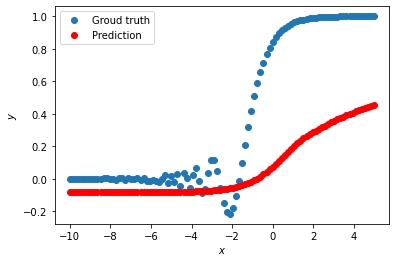

In [147]:
# already trying to predict. What if it works?
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)

In [151]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [152]:
def loss(pred, target):
    squares = (pred - target).abs()
    return squares.mean()

0.020361948758363724


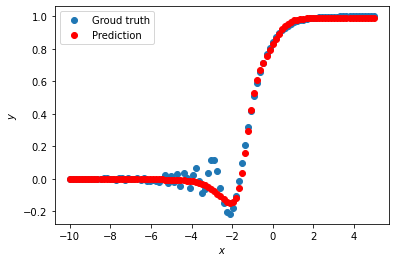

In [153]:
for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    # make backward
    loss_value.backward()
    # make step
    optimizer.step()
    
predict(net, x_validation, y_validation)
print(metric(net.forward(x_validation), y_validation).item())

In [14]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()